**<h2> Importing Libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import mlxtend as mlx

**<h2>Uploading Files**

In [2]:
nasa_df=pd.read_csv("/home/tarushi/Downloads/nasa.csv")
nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
a=np.array(nasa_df)
a[:2]

array([[3703080, 3703080, 21.6, 0.1272198785, 0.2844722965,
        127.2198785394, 284.4722965033, 0.0790507431,
        0.17676283539999998, 417.3880663071, 933.3080892598,
        '1995-01-01', 788947200000, 6.1158343887, 22017.003799315,
        13680.5099440799, 0.4194825299, 163.1787109375, 62753692.0,
        38993336.0, 'Earth', 17, '2017-04-06 08:36:37', 5,
        0.025281900000000003, 4.6339999999999995, 2458000.5,
        0.4255490832802685, 1.4070113027129758, 6.025981287138329,
        314.37391341340765, 609.599786407648, 0.8082589326784929,
        57.25746987539545, 2.005763672747459, 2458161.6417204863,
        264.8375332988031, 0.5905513880204395, 'J2000', True],
       [3723955, 3723955, 21.3, 0.1460679643, 0.32661789739999997,
        146.0679642714, 326.6178974458, 0.090762397, 0.20295088960000002,
        479.2256199, 1071.581062656, '1995-01-01', 788947200000,
        18.1139850263, 65210.3460948409, 40519.1731054305,
        0.38301446270000006, 148.9926300049

**<h2>Exploratory Data Analysis**

In [4]:
nasa_df.shape

(4687, 40)

In [5]:
nasa_df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

**<h3>Label Encoding**
    
We need to encode the Hazardous column.

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
nasa_df['Hazardous']=label.fit_transform(nasa_df['Hazardous'])


In [7]:
nasa_df['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

**<h3> Resampling**
    
Clearly, the above data is imbalanced by a large margin. Hence we'll be resampling in order to ensure that the model doesn't overfit. 

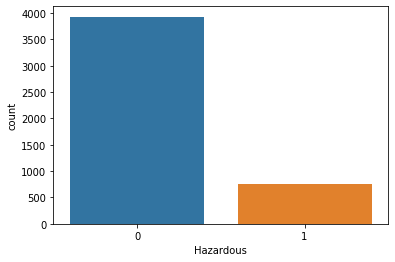

In [8]:
sns.countplot(nasa_df['Hazardous'])

In the next line of code , we'll be seperating transactions with class=1 .

In [9]:
not_hazard=nasa_df[nasa_df['Hazardous']==0]
not_hazard.shape

(3932, 40)

In [10]:
hazard=nasa_df[nasa_df['Hazardous']==1]
hazard.shape

(755, 40)

In [11]:
nasa_df=pd.concat([not_hazard[:1200],hazard],axis=0)

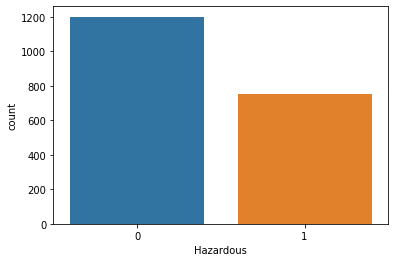

In [12]:
sns.countplot(nasa_df['Hazardous'])

**<h3>Dropping Columns**

In the next line of code, we will study the statistical qualities of data and drop values which are not significant contributors to the predictors.

In [13]:
nasa_df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,1.955000e+03,1.955000e+03,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,...,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1.955000e+03,1955.000000,1955.000000,1955.000000
mean,3.107155e+06,3.107155e+06,21.287460,0.259564,0.580402,259.563760,580.402212,0.161285,0.360645,851.587167,...,14.161411,174.260290,595.565955,0.761072,185.279998,1.921950,2.457803e+06,185.921829,0.780073,0.386189
std,5.987027e+05,5.987027e+05,2.581319,0.313242,0.700430,313.241853,700.430076,0.194639,0.435227,1027.696400,...,11.177783,102.470878,347.558307,0.242462,102.402857,0.908866,9.463462e+02,103.466278,0.349092,0.486999
min,2.001566e+06,2.001566e+06,13.920000,0.002016,0.004509,2.016299,4.508582,0.001253,0.002802,6.615155,...,0.078469,0.138230,176.557161,0.092784,0.006918,0.803765,2.450100e+06,0.225708,0.161222,0.000000
25%,2.441670e+06,2.441670e+06,19.500000,0.084053,0.187949,84.053340,187.948982,0.052228,0.116786,275.765561,...,5.521868,84.351106,345.612858,0.578852,96.271799,1.257935,2.457853e+06,98.388973,0.501739,0.000000
50%,3.329371e+06,3.329371e+06,20.900000,0.175612,0.392681,175.612318,392.681082,0.109120,0.244001,576.155919,...,11.076191,176.081146,474.500642,0.771326,194.827208,1.567017,2.457990e+06,189.998029,0.758692,0.000000
75%,3.638286e+06,3.638286e+06,22.500000,0.334622,0.748238,334.622374,748.238376,0.207925,0.464934,1097.842471,...,20.321411,257.726415,717.505096,0.951051,268.177497,2.337291,2.458109e+06,275.884164,1.041628,1.000000
max,3.781897e+06,3.781897e+06,30.600000,4.370740,9.773272,4370.740040,9773.271842,2.715851,6.072828,14339.698754,...,75.406667,359.905890,2232.944681,1.298398,359.993098,5.924213,2.458803e+06,359.841130,2.039000,1.000000


From the above distribution we see that the ranges and metrics are different for different columns, hence,we'll be normalizing the data.

Next we'll be dropping certain values which are unnecessary.

* Est Dia in M(Min)
* Est Dia in M(Max)
* Est Dia in Miles(max)
* Est Dia in Miles(min)
* Est Dia in Feet(min)
* Est Dia in Feet(max)
The above values have been deleted as we chose the metric as kilometer for measuring.
* Relative velocity km per sec: We will be using per hour
* Miles per hour: we are using km
* Miss Dist.(Astronomical)
* Miss Dist.(Lunar)
* Miss Dist.(miles) 

In [14]:
nasa_df.drop(['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(max)','Est Dia in Miles(min)',
            'Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per sec','Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(lunar)',
              'Miss Dist.(miles)',],axis=1,inplace=True)


In [15]:
nasa_df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Orbiting Body', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

**Dropping values with the same value in the entire dataset**

In [16]:
nasa_df['Orbiting Body'].value_counts()

Earth    1955
Name: Orbiting Body, dtype: int64

In [17]:
nasa_df['Equinox'].value_counts()

J2000    1955
Name: Equinox, dtype: int64

In [18]:
nasa_df.drop(['Orbiting Body','Equinox'],axis=1,inplace=True)
nasa_df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Orbit ID', 'Orbit Determination Date',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [19]:
nasa_df.drop(['Orbit Determination Date','Close Approach Date','Epoch Date Close Approach'],axis=1,inplace=True)

In [20]:
nasa_df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

**Final List of Variables**

The following variables are the ones with which we will be working with:

1.Neo Reference ID

2.Name

3.Absolute Magnitude

4.Est Dia in KM(min)

5.Est Dia in KM(max)

6.Relative Velocity km per hr

7.Miss Dist.(kilometers)

8.Orbit ID

9.Orbit Uncertainity

10.Minimum Orbit Intersection

11.Jupiter Tisserand Invariant

12.Epoch Osculation

13.Eccentricity

14.Semi Major Axis

15.Inclination

16.Asc Node Longitude

17.Orbital Period

18.Perihelion Distance

19.Perihelion Arg

20.Aphelion Dist

21.Perihelion Time

22.Mean Anomaly

23.Mean Motion

24.Hazardous

We'll continue with Data Analysis to further reduce the number of parameters.

In [21]:
def contour_plot(x,y):
    sns.kdeplot(x, y,cmap="mako",shade=True, shade_lowest=False)
    sns.set(font_scale=1)

In [22]:
from scipy.stats import pearsonr
def plot_graph_pvalue(x,y):
    sns.scatterplot(x,y)
    pearson,pvalue=pearsonr(x,y)
    sns.distplot(nasa_df['Relative Velocity km per hr'])
    print("Pvalue:%.5f" %pvalue)
    print("Pearson:%.3f"%pearson)

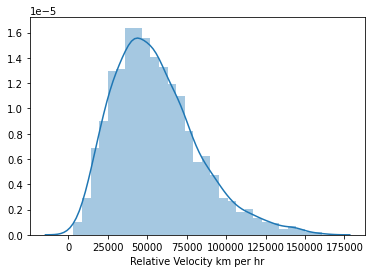

In [23]:
sns.distplot(nasa_df['Relative Velocity km per hr'])

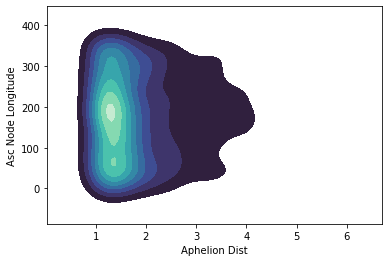

In [24]:
contour_plot(nasa_df['Aphelion Dist'],nasa_df['Asc Node Longitude'])

Pvalue:0.00000
Pearson:0.194


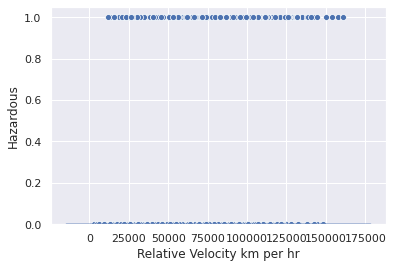

In [25]:
plot_graph_pvalue(nasa_df['Relative Velocity km per hr'],nasa_df['Hazardous'])

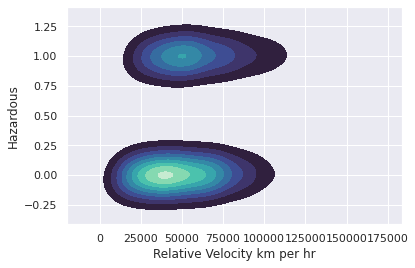

In [26]:
contour_plot(nasa_df['Relative Velocity km per hr'],nasa_df['Hazardous'])

Pvalue:0.00000
Pearson:-0.203


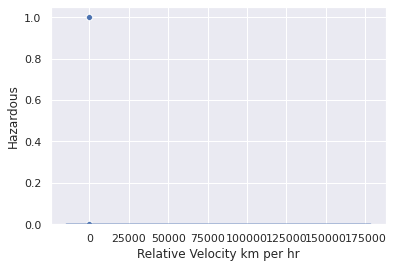

In [27]:
plot_graph_pvalue(nasa_df['Perihelion Distance'],nasa_df['Hazardous'])

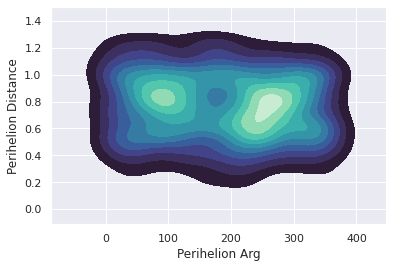

In [28]:
contour_plot(nasa_df['Perihelion Arg'],nasa_df['Perihelion Distance'])

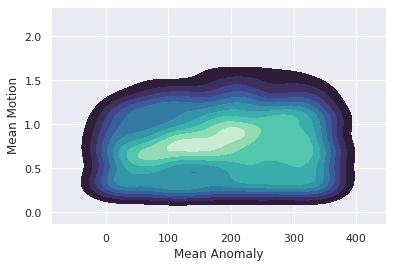

In [29]:
contour_plot(nasa_df['Mean Anomaly'],nasa_df['Mean Motion'])

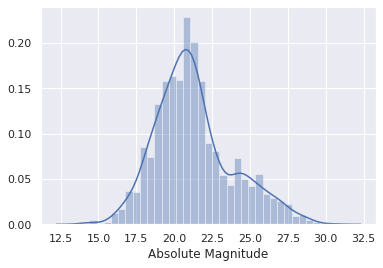

In [30]:
sns.distplot(nasa_df['Absolute Magnitude'])

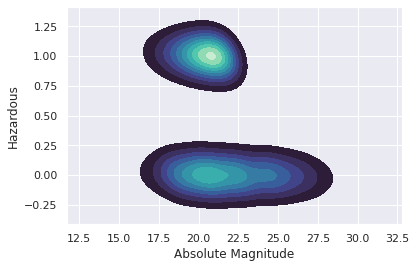

In [31]:
contour_plot(nasa_df['Absolute Magnitude'],nasa_df['Hazardous'])

Pvalue:0.00000
Pearson:-0.359


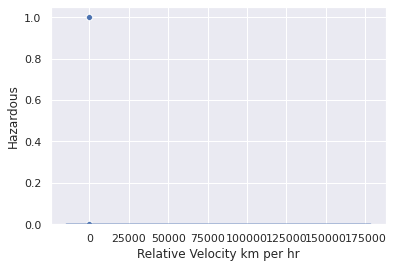

In [32]:
plot_graph_pvalue(nasa_df['Absolute Magnitude'],nasa_df['Hazardous'])

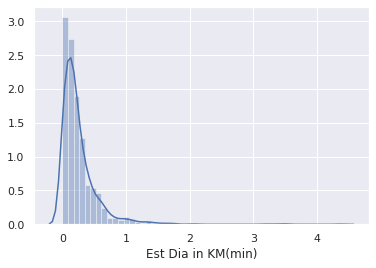

In [33]:
sns.distplot(nasa_df['Est Dia in KM(min)'])

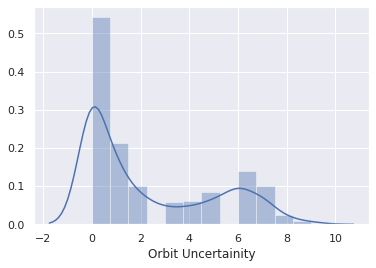

In [34]:
sns.distplot(nasa_df['Orbit Uncertainity'])

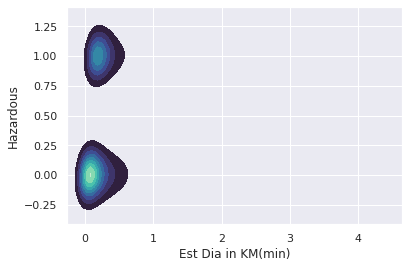

In [35]:
contour_plot(nasa_df['Est Dia in KM(min)'],nasa_df['Hazardous'])

Pvalue:0.00000
Pearson:0.144


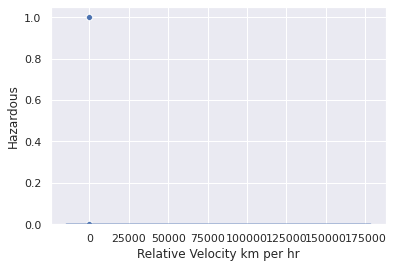

In [36]:
plot_graph_pvalue(nasa_df['Est Dia in KM(min)'],nasa_df['Hazardous'])

**<h3> Correlation Heatmap**

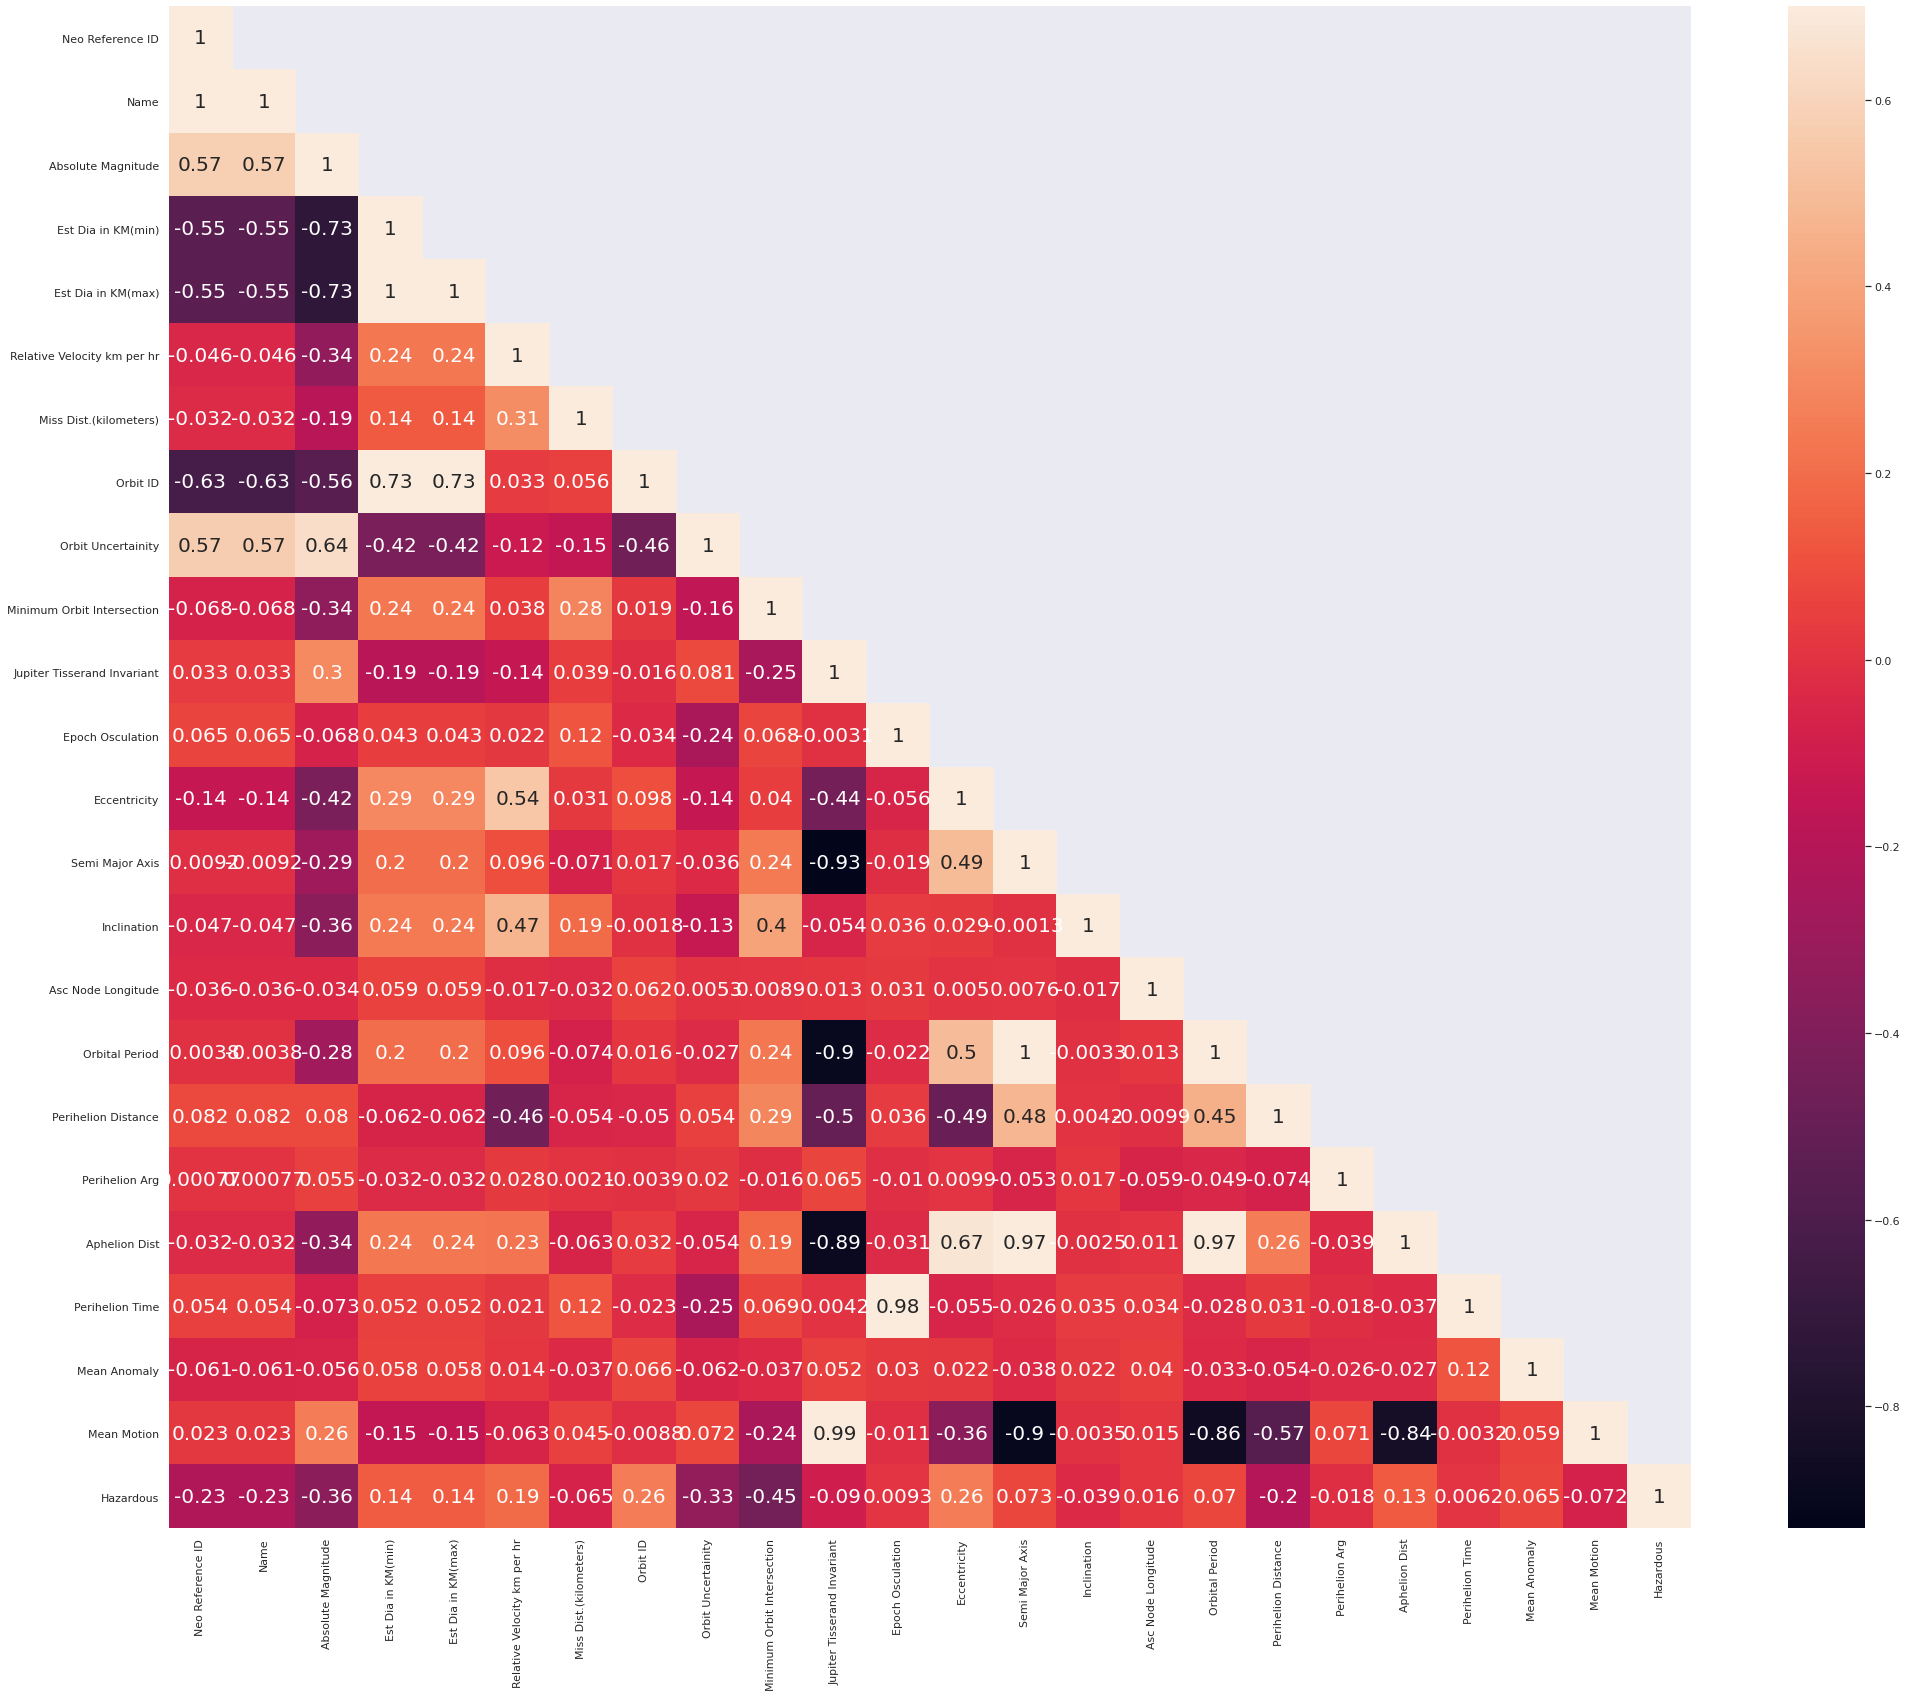

In [37]:
correlation_map = nasa_df[nasa_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True,annot_kws={"size": 20})

**<h3> Correlation map w.r.t Target Varaiable**

In [38]:
train=nasa_df.drop(['Hazardous'],axis=1)
test=nasa_df['Hazardous']
train.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
1,3723955,3723955,21.3,0.146068,0.326618,65210.346095,57298148.0,21,3,0.186935,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
3,3092506,3092506,27.4,0.008801,0.019681,40225.948191,42683616.0,7,6,0.005512,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
5,3671135,3671135,19.6,0.319562,0.714562,38911.838251,58759768.0,40,1,0.272213,...,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295
6,2495323,2495323,19.6,0.319562,0.714562,38911.829716,58759532.0,43,1,0.272213,...,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295
7,2153315,2153315,19.2,0.384198,0.859093,87918.782382,19324928.0,22,0,0.098758,...,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978


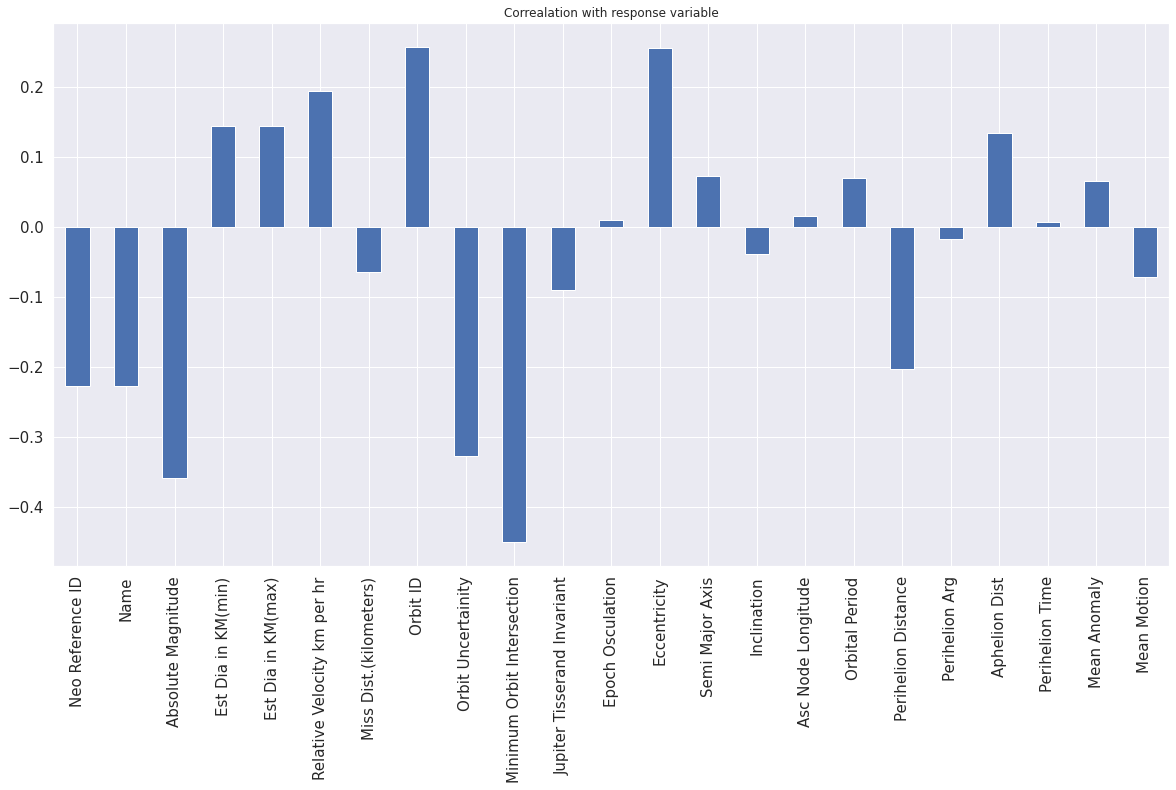

In [39]:
train.corrwith(test).plot.bar(figsize=(20,10),title="Correalation with response variable",fontsize=15,rot=90,grid=True)



In [40]:
nasa_df.drop(['Neo Reference ID','Name','Miss Dist.(kilometers)','Jupiter Tisserand Invariant',
             'Epoch Osculation','Semi Major Axis','Inclination','Asc Node Longitude','Perihelion Arg',
              'Orbital Period','Perihelion Time','Mean Anomaly','Mean Motion'],axis=1,inplace=True)

**<h2> Exploratory Data Analysis Conclusion**

From the above data analysis , we have dropped the columns which have shown least correlation to the target variable. The remaining columns are as follows:
    
* Absolute Magnitude 
* Est Dia in KM(min) 
* Est Dia in KM(max) 
* Relative Velocity km per hr
* Orbit ID 
* Orbit Uncertainity 
* Minimum Orbit Intersection 
* Eccentricity 
* Perihelion Distance 
* Aphelion Dist 
* Hazardous

    
 

In [41]:
nasa_df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Relative Velocity km per hr', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Eccentricity', 'Perihelion Distance',
       'Aphelion Dist', 'Hazardous'],
      dtype='object')

**<h2> Implementing Machine Learning Model**

**<h3>Preprocessing**

In [42]:
nasa_df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per hr,Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Perihelion Distance,Aphelion Dist,Hazardous
1,21.3,0.146068,0.326618,65210.346095,21,3,0.186935,0.351674,0.718200,1.497352,0
3,27.4,0.008801,0.019681,40225.948191,7,6,0.005512,0.216578,0.983902,1.527904,0
5,19.6,0.319562,0.714562,38911.838251,40,1,0.272213,0.563441,0.577800,2.069265,0
6,19.6,0.319562,0.714562,38911.829716,43,1,0.272213,0.563441,0.577800,2.069265,0
7,19.2,0.384198,0.859093,87918.782382,22,0,0.098758,0.449763,0.680905,1.794045,0


In [43]:
def check_null():
    for i in nasa_df.columns:
        print(i,":",nasa_df[str(i)].isna().sum())

In [62]:
class_scores=[]
class_scores=[['Model','F1 accuracy']]
def save_scores_classs(model_name,f1):
    class_scores.append([model_name,f1])

In [45]:
check_null()

Absolute Magnitude : 0
Est Dia in KM(min) : 0
Est Dia in KM(max) : 0
Relative Velocity km per hr : 0
Orbit ID : 0
Orbit Uncertainity : 0
Minimum Orbit Intersection : 0
Eccentricity : 0
Perihelion Distance : 0
Aphelion Dist : 0
Hazardous : 0


No null values in the dataset.

**<h4>Normalizing and Splitting Data**

In [46]:
train=nasa_df.drop(['Hazardous'],axis=1)
test=nasa_df['Hazardous']

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train=sc.fit_transform(train)
train[:2]

array([[ 0.00485909, -0.36241911, -0.36241911,  0.3711047 , -0.36952371,
         0.26311091,  1.34825837, -0.25856407, -0.17686555, -0.46729289],
       [ 2.36859706, -0.80074374, -0.80074374, -0.55718186, -0.70469732,
         1.39527928, -0.76829852, -0.99578174,  0.91926306, -0.43366886]])

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,shuffle=True)

**<h3>1. Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       228
           1       0.91      0.90      0.90       163

    accuracy                           0.92       391
   macro avg       0.92      0.91      0.92       391
weighted avg       0.92      0.92      0.92       391



In [63]:
save_scores_classs('Logistic Regression',0.92)

**<h3>2.Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       228
           1       1.00      0.98      0.99       163

    accuracy                           0.99       391
   macro avg       0.99      0.99      0.99       391
weighted avg       0.99      0.99      0.99       391



In [64]:
save_scores_classs('Decision Tree Classifier',0.99)

**<h3>3.KNeighbors Classifier**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       228
           1       0.87      0.88      0.87       163

    accuracy                           0.89       391
   macro avg       0.89      0.89      0.89       391
weighted avg       0.89      0.89      0.89       391



In [65]:
save_scores_classs('KNeighbors Classifier',0.90)

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

estimators = [('knn',KNeighborsClassifier()),('lr',LogisticRegression()),('dtr',DecisionTreeClassifier())]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [60]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       228
           1       1.00      0.99      0.99       163

    accuracy                           0.99       391
   macro avg       1.00      0.99      0.99       391
weighted avg       0.99      0.99      0.99       391



In [66]:
save_scores_classs('Stacking',0.99)

**<h2> Model Analysis**

In [67]:
column_class=class_scores[0]
class_pf = pd.DataFrame(class_scores[1:],columns=column_class)
class_pf

,Model,F1 accuracy
0,Logistic Regression,0.92
1,Decision Tree Classifier,0.99
2,KNeighbors Classifier,0.90
3,Stacking,0.99


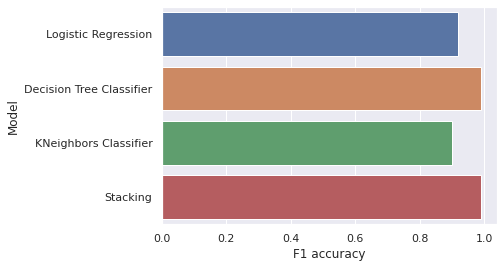

In [68]:
sns.barplot(class_pf['F1 accuracy'],class_pf['Model'])

**<h2> Conclusion**
    
    
From the above Model Analysis we see Decision Tree Classifier outperform the other models significantly. Hence, we can conclude that Decision Tree Classifier is the ideal model for this case.